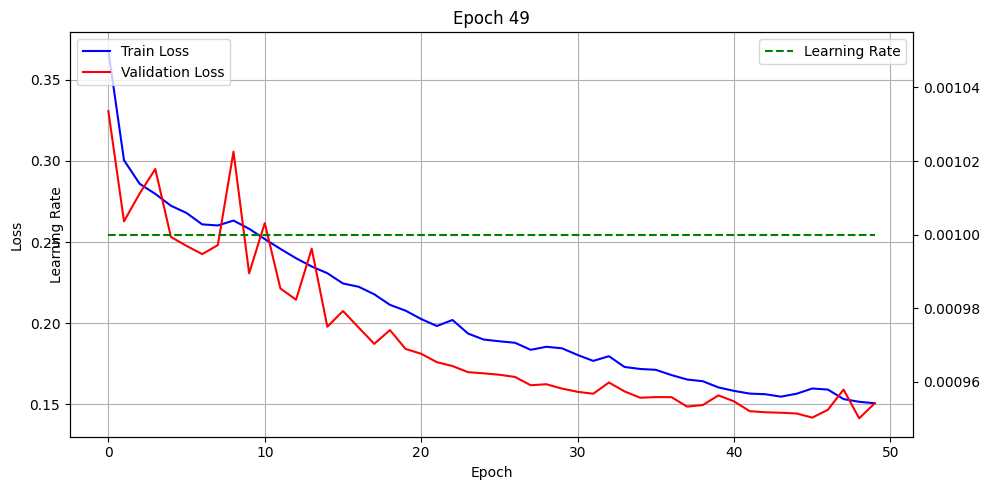

Merged raster saved as data/prediction/train/merged.tif
Merged raster saved as data/error/train/merged.tif
Merged raster saved as data/probabilities/train/merged.tif
Merged raster saved as data/prediction/val/merged.tif
Merged raster saved as data/error/val/merged.tif
Merged raster saved as data/probabilities/val/merged.tif


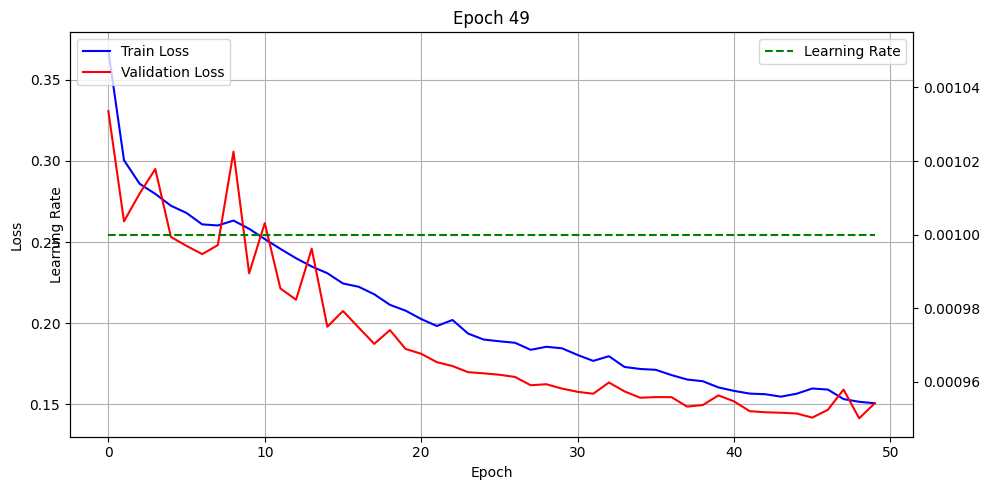

In [ ]:
from pathlib import Path
from simple_model.dataloader import ImagesLoader
from simple_model.nn import SegmentationConvolutionalNetwork
import torch

image_shape = (512, 512)
nodata = 0
images_path = Path("data/image/tiles")
masks_path = Path("data/mask/tiles")

images_loader = ImagesLoader(image_shape=image_shape, nodata=nodata)
images_loader.load_data(images_path, masks_path)
dataloaders = images_loader.get_dataloaders(batch_size=8, train_proportion=0.8)

model = SegmentationConvolutionalNetwork(image_size=image_shape)

# Better speed for CPU
torch.compile(model)

model.run(dataloaders=dataloaders, epochs=200, stop_early_after=15)

prediction_folder = Path("data/prediction")
error_folder = Path("data/error")
probabilities_folder = Path("data/probabilities")
model.save_predictions(
    images_loader=images_loader,
    dataloaders=dataloaders,
    prediction_folder=prediction_folder,
    error_folder=error_folder,
    probabilities_folder=probabilities_folder,
)